### Code to test a variety of preprocessing steps prior to classification and clustering

Preprocess Steps Tested:
    - Expansion by Ratios
    - Data Reduction via NMF and PCA
    - Data Normalization via MinMax Scaler, Power Transformation, and by composition
    - Data Standardization via Standard Scaler and Robust Scaler

For each of these transformations and combinations of transformations, we measure the
unsupervised clustering via HCV scores and evaluate the supervised classification via
accuracy, precision and recall. 

In addition to understanding what is going on behind the curtain, we utilize statistical analysis (i.e. Dip Test, variation, correlation etc.) to evaluate how the structure of the data affects the outcomes and preprocessing steps that will be useful for geochemical data.

## Initialize a bunch of stuff

In [1]:
import sys
sys.path.append('../data/')
sys.path.append('../scripts/')
sys.path.append('../ml_env/')

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
from sklearn import linear_model, datasets
from scipy.cluster import hierarchy
from sklearn.metrics import silhouette_samples, silhouette_score, homogeneity_completeness_v_measure
from scipy.cluster.hierarchy import dendrogram
import matplotlib.cm as cm
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
import statistics as st
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.cluster import v_measure_score
from scipy import stats
from sklearn.decomposition import NMF
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from scipy.signal import find_peaks
import scipy.sparse

from itertools import combinations
from scipy import mean


from importlib import reload
import GeochemFunctions
import StatsFunctions

## Step 1: Import Data

In [2]:
##### Import Hawaii Data 

path = "../data/Hawaii Loa Kea Dataset for Clustering Iso Major.csv"

#url='https://drive.google.com/file/d/1459wwad2BjHSmSL75HQq40F4WO1AtK1l/view?usp=sharing'
#path='https://drive.google.com/uc?export=download&id='+ url.split('/')[-2]

df1=pd.read_csv(path, header=0)

df1=df1.dropna()
labels= df1.loc[:,'Trend'] 
df1 = df1.drop(columns=['Trend','Volcano'])

In [3]:
### Import Data for Global Basalt Data (Full Dataset)

path = "../data/tec discrim diagrams.csv"

#df= pd.read_csv('tec discrim diagrams.csv', header=0)

#### From Online
# url='https://drive.google.com/file/d/1is0yOmR6e5NnFRS_aWXT7028A_Hyg8nB/view?usp=sharing'
# path='https://drive.google.com/uc?export=download&id='+ url.split('/')[-2]
df1=pd.read_csv(path, header=0)


df1.dropna()
labels= df1.loc[:,'Cluster_ID'] 
df1 = df1.drop(columns=['Cluster_ID', 'Number'])

# 1. Make Ratios/Expand Dataset (prior to other preprocessing steps)

In [4]:
reload(GeochemFunctions)

df1 = GeochemFunctions.makeratios(df1)

# 2. Normalizations

In [5]:
# method options are: 'minmax','powert','columnnorm', 'normalize'
reload(GeochemFunctions)

method = 'normalize'
df1 = GeochemFunctions.normalizedata(df1,method)

# Standardizations

In [6]:
# method options are: 'standardscalar','robustscalar', 'morb'
reload(GeochemFunctions)

method = 'robustscalar'
df1 = GeochemFunctions.scaledata(df1,method)

# Statistical Tests

In [7]:
#pip install unidip


In [8]:
from unidip import UniDip
import unidip.dip as dip
reload(StatsFunctions)

df = df1

corr, avg_corr, Corr_Avg = StatsFunctions.corrcolumns(df)

var, avg_var, AllVar = StatsFunctions.coefvar(df)

dip_p_avg, avg_d, All_Dip = StatsFunctions.diptest(df)

Text(0, 0.5, 'Dip Test (p-value for null=unimodal)')

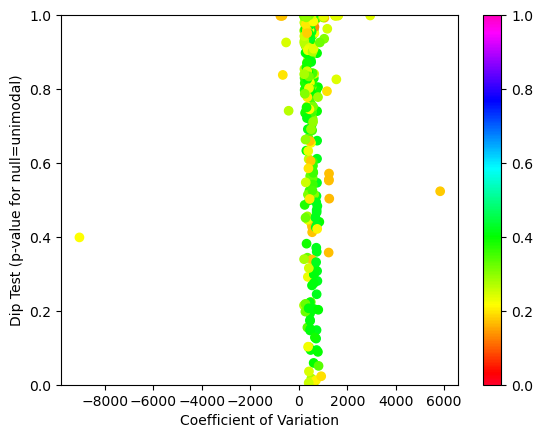

In [9]:
#plot up results
plt.figure()
plt.scatter(var, dip_p_avg, c=Corr_Avg, cmap='gist_rainbow')
#plt.vlines(.1, 0, 1, colors='r', linestyles='dotted')
#plt.hlines(.1, 0, 100, colors='g', linestyles='dotted')
plt.colorbar()
#plt.xlim(0,100)
plt.ylim(0,1)
plt.clim(0,1)
plt.xlabel('Coefficient of Variation')
plt.ylabel('Dip Test (p-value for null=unimodal)')
#plt.cbarlabel('Correlation Average')
#plt.yscale('log')

# 4. Data Reduction and Transformation

# PCA 

In [10]:
# PCA Data

#choose here whether to look at expanded data (w ratios, as df2) or original (df1)
df = df1

pca1 = PCA(whiten=True)
pca_data = pca1.fit_transform(df)
df_PC = pd.DataFrame(pca_data)
components1 = pca1.components_

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

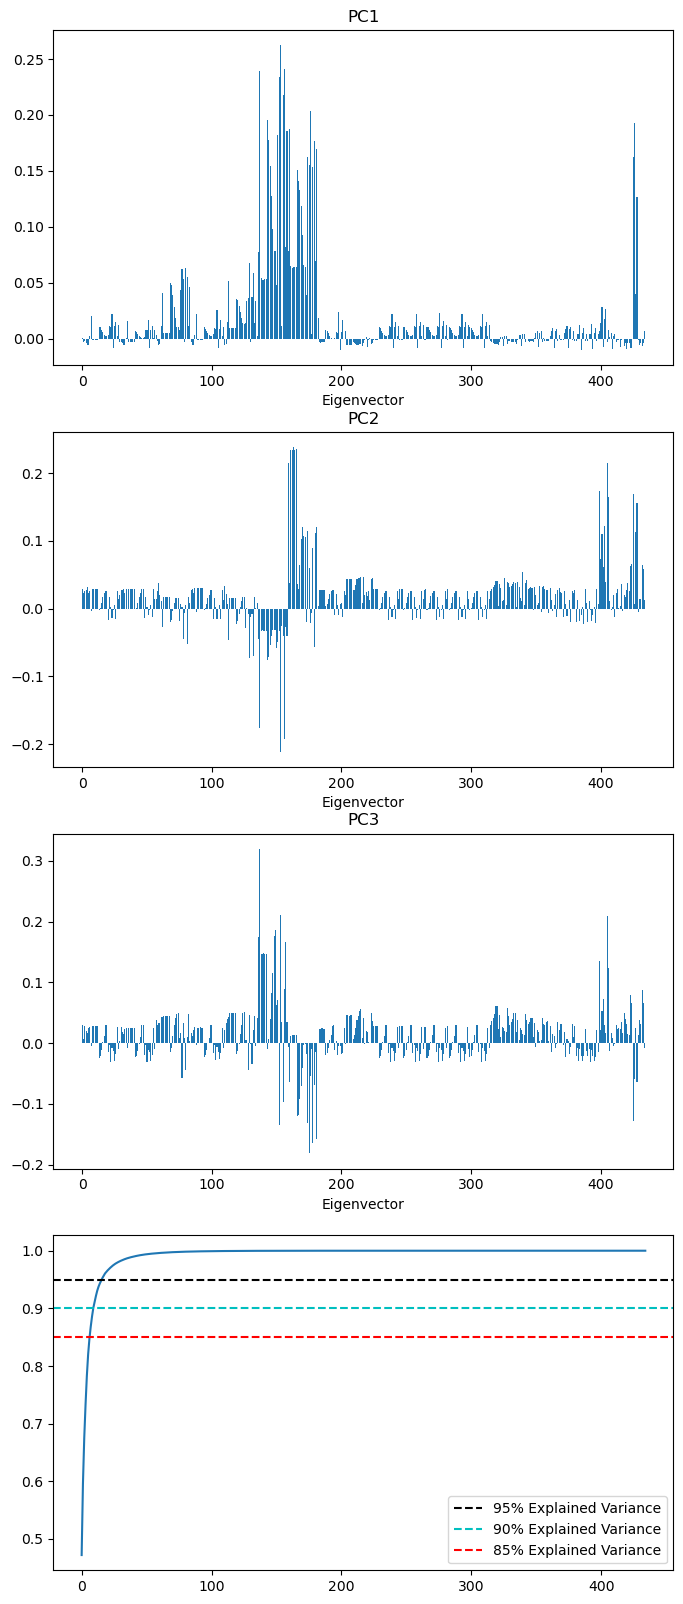

In [11]:
##### PCA Eigenvector Bar Plots
fig, axs = plt.subplots(4, 1,figsize=(8,20))

axs[0].bar(list(df.columns.values), components1[0])

# x=np.array([1,2,3])
# plt.figure()
# plt.bar(list(df.columns.values), components1[0])
axs[0].title.set_text('PC1')
axs[0].set_xlabel('Eigenvector')
#axs[0, 0].xticks(rotation='vertical')

#plt.figure()
axs[1].bar(list(df.columns.values), components1[1])
axs[1].title.set_text('PC2')
axs[1].set_xlabel('Eigenvector')
#axs[0, 1].xticks(rotation='vertical')

#plt.figure()
axs[2].bar(list(df.columns.values), components1[2])
axs[2].title.set_text('PC3')
axs[2].set_xlabel('Eigenvector')
#axs[1, 0].xticks(rotation='vertical')


#plt.figure()
axs[3].plot(range(len(pca1.explained_variance_ratio_)),np.cumsum(pca1.explained_variance_ratio_))
axs[3].axis('tight')
axs[3].axhline(y = .95, color='k', linestyle='--', label = '95% Explained Variance')
axs[3].axhline(y = .90, color='c', linestyle='--', label = '90% Explained Variance')
axs[3].axhline(y = .85, color='r', linestyle='--', label = '85% Explained Variance')
axs[3].legend(loc='best')
axs[3].grid(b=True)
axs[3].set_xlabel('Dimensions Included')
axs[3].set_ylabel('Fraction of variance explained')

435


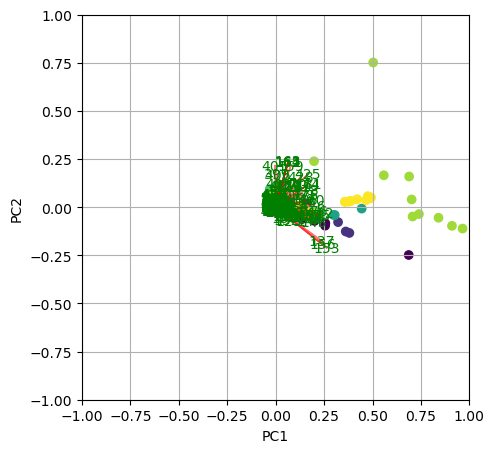

In [12]:
###### PCA Biplot

elements=list(df.columns.values)
lbl=labels+1

#['SIO2', 'TIO2', 'AL2O3', 'CAO','MGO', 'MNO', 'K2O', 'NA2O', 'P2O5', 'PB206_PB204', 'PB207_PB204', 'PB208_PB204']
print(len(elements))
def myplot(score,coeff,labels=elements):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c=lbl) #c = y
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1, coeff[i,1] * 1, "Element"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1, coeff[i,1] * 1, labels[i], color = 'g', ha = 'center', va = 'center')


#Call the function. Use only the 2 PCs.
plt.figure(figsize=(5,5))
myplot(pca_data[:,0:2],np.transpose(pca1.components_[0:2, :]))
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()
plt.show()

# NMF

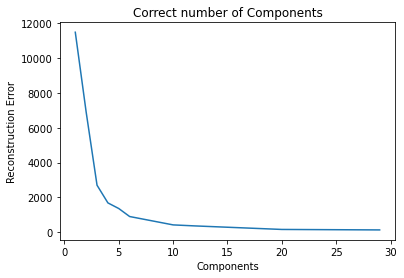

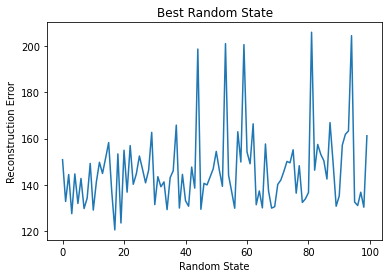

In [18]:
##################### NMF Data
df=df1

# First find right number of components with elbow plot
x=[1,2,3,4,5,6,10,12,20,29]
Errors=[]
Errors2=[]
randomstate=100
for i in x:
    model = NMF(n_components=i, init='nndsvdar', solver='mu', max_iter=1000, random_state=76) 

    W = model.fit_transform(df)
    H = model.components_
    error=model.reconstruction_err_
    Errors.append(error)
    
plt.figure()
plt.plot(x,Errors)
plt.title('Correct number of Components')
plt.xlabel('Components')
plt.ylabel('Reconstruction Error')

#### Then find best randomstate

for j in range(randomstate):
    model_rs=NMF(n_components=29, init='nndsvdar', solver='mu', max_iter=1500, random_state=j) 
    W_rs = model_rs.fit_transform(df)
    H_rs = model_rs.components_ 
    error2=model_rs.reconstruction_err_
    Errors2.append(error2)
    
plt.figure()
plt.plot(range(randomstate),Errors2)
plt.title('Best Random State')
plt.xlabel('Random State')
plt.ylabel('Reconstruction Error')

minerror = min(Errors2)
errorpos = Errors2.index(minerror)
emin = range(randomstate)[errorpos]

### Use best random state and best number of components to create best NMF decomposition

model_best=NMF(n_components= 29, init='nndsvdar', solver='mu', max_iter=1500, random_state=emin) 
W_best = model_best.fit_transform(df)
H_best = model_best.components_


df_W = pd.DataFrame(W_best)


Text(0.5, 1.0, 'H')

<Figure size 432x288 with 0 Axes>

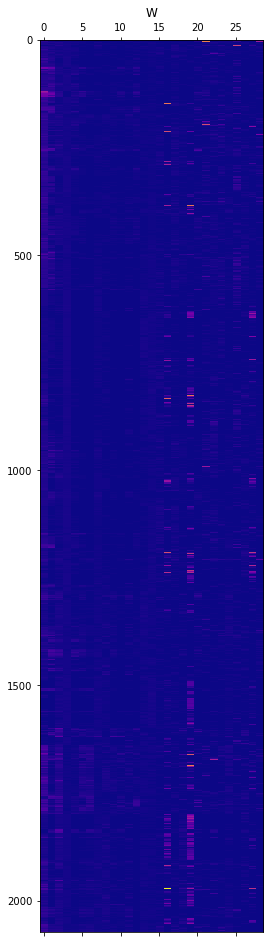

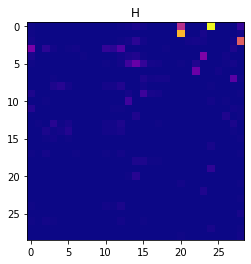

In [46]:
######## NMF Matrix Plots with best model

plt.figure()
plt.matshow(W_best, aspect='auto', cmap='plasma')
plt.title('W')

plt.figure()
plt.imshow(H_best, cmap='plasma')
plt.title('H')

## Step 3: Unsupervised Clustering Score (Find Max HCV Score for kmeans clustering)

In [ ]:
 ################### Clustering
n_clusters=[2,4,6,8,10]
random_states=100
   
###Cluster each data set
SS_kmeans=[]
HCV_kmeans=[]


max_hcv=[]
        
for q in range(random_states):
    y_pred = KMeans(n_clusters=8, random_state=q).fit_predict(W_best)
#    y_pred_spec = SpectralClustering(n_clusters=2, random_state=q, affinity='nearest_neighbors', eigen_solver='arpack', assign_labels='kmeans').fit_predict(Features)
#    y_pred_agg = AgglomerativeClustering(n_clusters=3).fit_predict(X1)

#    Metrics for Clustering 

#    silhouette_avg = silhouette_score(df1, y_pred)
#    print(silhouette_avg)
    hcv=v_measure_score(labels ,y_pred)
#    print(hcv)
#            SS_kmeans.append(silhouette_avg)
            
    HCV_kmeans.append(hcv)
    silhouette_avg = silhouette_score(W_best, y_pred)
    SS_kmeans.append(silhouette_avg)
    
max_HCV = max(HCV_kmeans)  # Find the maximum value
max_hcv.append(max_HCV)
print(max_hcv)

max_HCV_pos = HCV_kmeans.index(max_HCV)
hcvmax = range(random_states)[max_HCV_pos]


### Best Clustering Configuration

y_k_pred=KMeans(n_clusters=8, random_state=hcvmax).fit_predict(W_best)
hcv_spec_best=v_measure_score(labels,y_k_pred)
print(hcv_spec_best)

In [ ]:
#### Plots of Best Clustering Configuration

# Original Data Labels

plt.figure()
plt.scatter(df_PC.iloc[:,0], df_PC.iloc[:,1], c=labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('True Labels')

# Labels after Clustering

plt.figure()
plt.scatter(df_PC.iloc[:,0], df_PC.iloc[:,1], c=y_k_pred)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustered Labels')

# Plot Confusion Matrix

cm2 = metrics.confusion_matrix(labels ,y_k_pred)
plt.figure(figsize=(3,3), dpi=300)
sns.heatmap(cm2, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'magma');
plt.ylabel('Actual Label', fontsize=12);
plt.xlabel('Predicted Label', fontsize=12);

## Step 4: Supervised Classification Score (Find Max Accuracy Training Model- MLR)

In [ ]:
t1 = time.time()
random_state=50
Accuracy=[]

### Find the highest accuracy training model (on test subset) random state

for r in range(random_state):
    features_train, features_test, labels_train, labels_test = train_test_split(W_best, labels, test_size=0.25, random_state=r)
    lr1 = LogisticRegression(solver = 'lbfgs', max_iter=500, multi_class='multinomial')
    lr1.fit(features_train, labels_train)


# We want to check model performance (accuracy)
    accuracy = lr1.score(features_test, labels_test)
    Accuracy.append(accuracy)


plt.figure()
plt.scatter(range(random_state), Accuracy)

accuracymax = max(Accuracy)
rspos = Accuracy.index(accuracymax)
xmax = range(random_state)[rspos]

run_time1 = time.time() - t1
print('Run Time 1=:', run_time1)


### Best Training Model

features_train_b, features_test_b, labels_train_b, labels_test_b = train_test_split(W_best, labels, test_size=0.25, random_state=xmax)
lr_best = LogisticRegression(solver = 'lbfgs', max_iter=500, multi_class='multinomial')
lr_best.fit(features_train_b, labels_train_b)

## How does the model look
#print(lr1.coef_)



### Other Metrics for Best Training Model Data (precision, recall)

predictions_best=lr_best.predict(features_test_b)

precision = metrics.precision_score(labels_test_b, predictions_best, average='weighted')
print('Precision:',precision)
recall = metrics.recall_score(labels_test_b, predictions_best, average='weighted')
print('Recall:',recall)
accuracy_best = lr_best.score(features_test_b, labels_test_b)


In [ ]:
### Plot Confusion Matrix for Best Training Model

cm1 = metrics.confusion_matrix(labels_test_b, predictions_best)
plt.figure(figsize=(5,5), dpi=300)
sns.heatmap(cm1, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'magma');
plt.ylabel('Actual Label', fontsize=12);
plt.xlabel('Predicted Label', fontsize=12);
all_sample_title = 'Overall Accuracy Score: {0}'.format("%.2f" % accuracy_best)
plt.title(all_sample_title, size = 14);